In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./data/census_df.csv")

In [3]:
df

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39235,48,Local-gov,Masters,14.0,Divorced,Other-service,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
39236,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
39237,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
39238,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


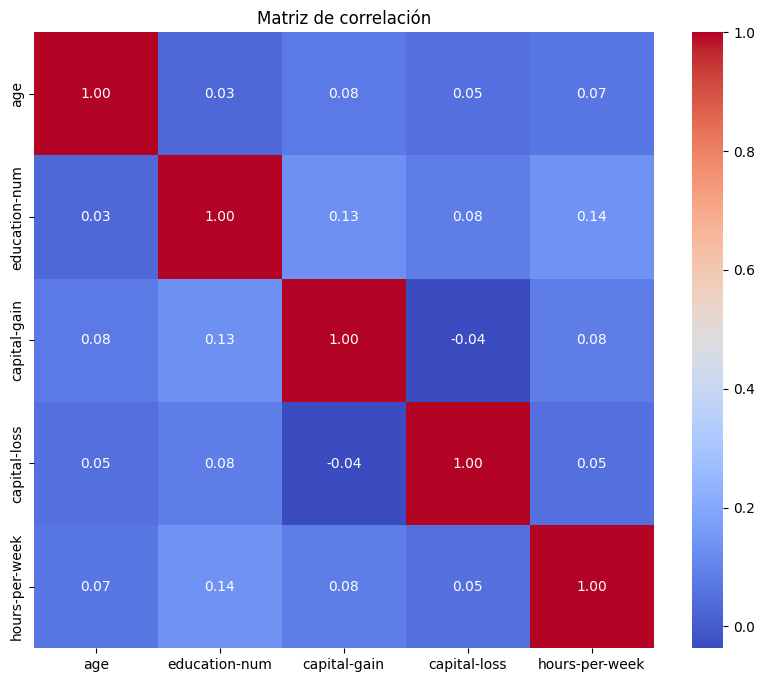

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

## PREPROCESAMIENTO DE DATOS

Numeric features:['age','education-num','capital-gain','capital-loss','hours-per-week']

- log

- Min max escaler


Categorical features:['workclass','education_level','marital-status','occupation','relationship','race','native-country']

- Onehotencoder


income=TARGET

In [5]:
num_features = ['age','education-num','capital-gain','capital-loss','hours-per-week']
cat_features = ['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country']

In [6]:
import sys
sys.path.append('C:/Users/laura/OneDrive/Desktop/PROYECTO ML/DS-desafio/desafio')

from tools import apply_onehot_encoder

In [7]:
df_concatenated = apply_onehot_encoder(train=df, columns_to_encode=cat_features, test=None)

In [8]:
df_concatenated

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13.0,2174.0,0.0,40.0,<=50K,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,13.0,0.0,0.0,13.0,<=50K,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,9.0,0.0,0.0,40.0,<=50K,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,7.0,0.0,0.0,40.0,<=50K,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,13.0,0.0,0.0,40.0,<=50K,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39235,48,14.0,0.0,0.0,40.0,<=50K,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39236,33,13.0,0.0,0.0,40.0,<=50K,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39237,39,13.0,0.0,0.0,36.0,<=50K,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39238,44,13.0,5455.0,0.0,40.0,<=50K,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
df_concatenated['income'] = df_concatenated['income'].apply(lambda x: 0 if x == '<=50K' else 1 )

In [10]:
df_concatenated

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13.0,2174.0,0.0,40.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,13.0,0.0,0.0,13.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,9.0,0.0,0.0,40.0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,7.0,0.0,0.0,40.0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,13.0,0.0,0.0,40.0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39235,48,14.0,0.0,0.0,40.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39236,33,13.0,0.0,0.0,40.0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39237,39,13.0,0.0,0.0,36.0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39238,44,13.0,5455.0,0.0,40.0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:

# Columnas para la transformación logarítmica y estándar
log_std_features = ['age', 'capital-gain', 'capital-loss']
std_features = ['education-num', 'hours-per-week',]

# Función para aplicar la transformación logarítmica
def log_transform(X):
    return np.log1p(X + 1)

# Crear el pipeline para las columnas seleccionadas
pipeline = ColumnTransformer([
    ('log_transform', FunctionTransformer(log_transform, validate=False), log_std_features),
    ('min_max_scaler', MinMaxScaler(), std_features)
], remainder='passthrough')

# Aplicar el pipeline a las columnas seleccionadas
transformed_df1 = pipeline.fit_transform(df_concatenated)

# Obtener los nombres de las columnas originales
column_names = list(df_concatenated.columns)

# Crear un DataFrame con los datos transformados y los nombres de las columnas originales
transformed_df1 = pd.DataFrame(transformed_df1, columns=column_names)


In [12]:
transformed_df1

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,3.713572,7.685244,0.693147,0.800000,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.951244,0.693147,0.693147,0.800000,0.122449,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.688879,0.693147,0.693147,0.533333,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.007333,0.693147,0.693147,0.400000,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3.401197,0.693147,0.693147,0.800000,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39235,3.912023,0.693147,0.693147,0.866667,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39236,3.555348,0.693147,0.693147,0.800000,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39237,3.713572,0.693147,0.693147,0.800000,0.357143,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39238,3.828641,8.604654,0.693147,0.800000,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## FEATURE SELECTION

In [13]:
skb = SelectKBest(f_classif, k=20)
X_NEW = skb.fit_transform(transformed_df1.drop('income', axis=1), transformed_df1['income'],)


In [14]:
# Obtener el índice de las características seleccionadas
selected_features_idx = skb.get_support()

# Obtener el nombre de las características originales
feature_names = transformed_df1.drop('income', axis=1).columns

# Filtrar las características seleccionadas
selected_features = feature_names[selected_features_idx]

# Imprimir las características seleccionadas
print(selected_features)

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Self-emp-inc',
       'education_level_ Bachelors', 'education_level_ Masters',
       'education_level_ Prof-school', 'marital-status_ Married-civ-spouse',
       'marital-status_ Never-married', 'occupation_ Exec-managerial',
       'occupation_ Other-service', 'occupation_ Prof-specialty',
       'relationship_ Husband', 'relationship_ Not-in-family',
       'relationship_ Own-child', 'relationship_ Unmarried', 'sex_ Female',
       'sex_ Male'],
      dtype='object')


In [16]:
X_NEW = pd.DataFrame(X_NEW, columns=selected_features)

In [17]:
X_NEW

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Self-emp-inc,education_level_ Bachelors,education_level_ Masters,education_level_ Prof-school,marital-status_ Married-civ-spouse,marital-status_ Never-married,occupation_ Exec-managerial,occupation_ Other-service,occupation_ Prof-specialty,relationship_ Husband,relationship_ Not-in-family,relationship_ Own-child,relationship_ Unmarried,sex_ Female,sex_ Male
0,3.713572,7.685244,0.693147,0.800000,0.397959,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.951244,0.693147,0.693147,0.800000,0.122449,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.688879,0.693147,0.693147,0.533333,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4.007333,0.693147,0.693147,0.400000,0.397959,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3.401197,0.693147,0.693147,0.800000,0.397959,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39235,3.912023,0.693147,0.693147,0.866667,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
39236,3.555348,0.693147,0.693147,0.800000,0.397959,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
39237,3.713572,0.693147,0.693147,0.800000,0.357143,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
39238,3.828641,8.604654,0.693147,0.800000,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## DIVISION DATOS


In [18]:
X_NEW.to_csv('X_NEW.csv')

In [19]:
TRAIN, TEST = train_test_split(X_NEW, test_size=0.2, random_state=42)


In [25]:
y_train, y_test = train_test_split(transformed_df1['income'],test_size=0.2, random_state=42)


In [27]:
X_train, X_val, y_train, y_val = train_test_split(TRAIN, y_train, test_size=0.3, random_state=42)